# Ensemble Learning

_TYPEs_
1. Voting Ensemble
2. Bagging Ensemble _(Ex. RandomForest)_
3. Boosting _(Ex. Adaboost, gradientBoost, XgBoost)_
4. Stacking 

## 1. Voting Ensemble 

### a. Classification-

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
df = pd.read_csv('data/Iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# remove Id col
df = df.iloc[:,1:]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Label encode Species
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


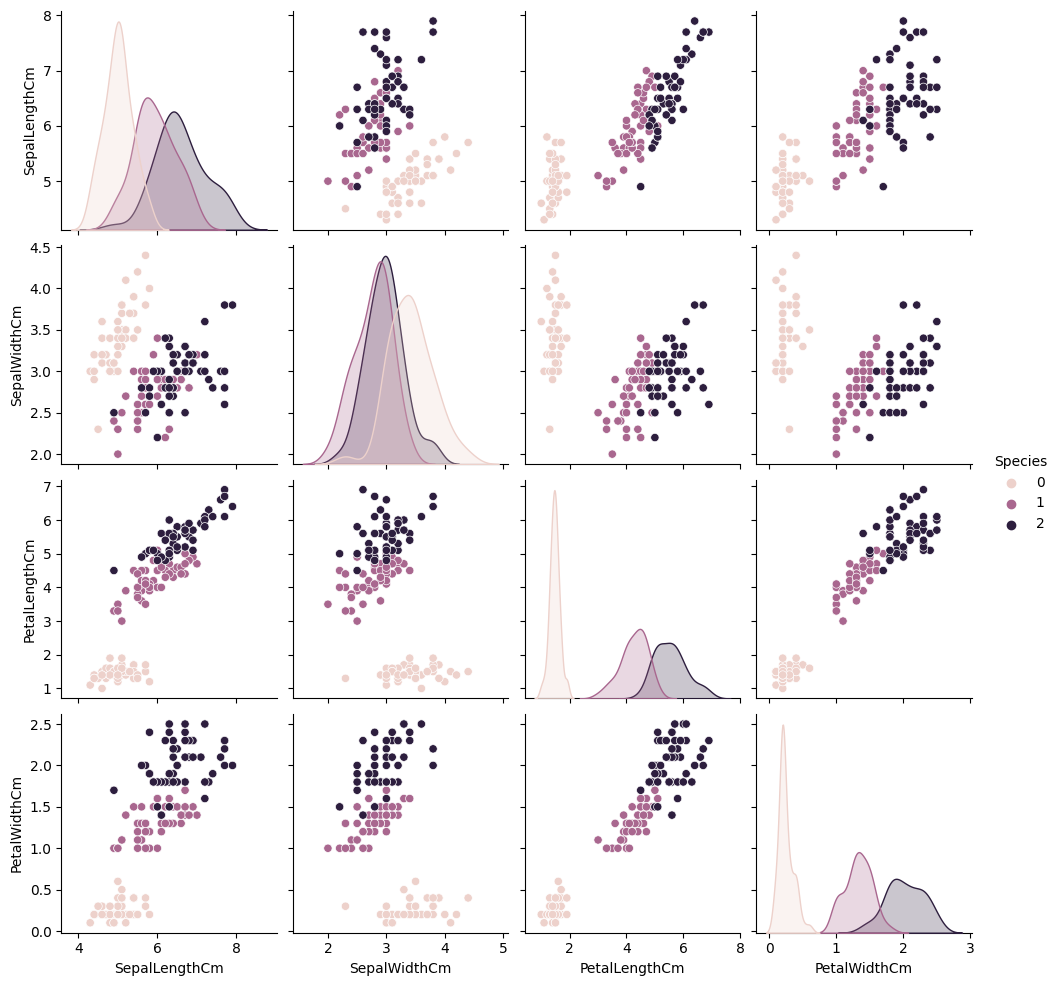

In [5]:
import seaborn as sns
sns.pairplot(df,hue='Species')

In [6]:
new_df = df[df['Species'] != 0][['SepalLengthCm','SepalWidthCm','Species']]
new_df.head()

,SepalLengthCm,SepalWidthCm,Species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [7]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

In [9]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.81
rf 0.72
knn 0.76


In [10]:
from sklearn.ensemble import VotingClassifier

#### Hard Voting-

In [11]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.77


#### Soft Voting-

In [12]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.77


#### Weighted Voting-

In [13]:
for i in range(1,3):
    for j in range(1,3):
        for k in range(1,3):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))

for i=1,j=1,k=1 0.77
for i=1,j=1,k=2 0.76
for i=1,j=2,k=1 0.73
for i=1,j=2,k=2 0.76
for i=2,j=1,k=1 0.77
for i=2,j=1,k=2 0.77
for i=2,j=2,k=1 0.77
for i=2,j=2,k=2 0.77


#### _Same Algo Classfiers_

In [14]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [15]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93


### b. Regression-

In [16]:
from sklearn.datasets import load_boston
import numpy as np
X,y = load_boston(return_X_y=True)
X.shape

c:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

(506, 13)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [18]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()
estimators = [('lr',lr),('dt',dt),('svr',svr)]

In [19]:
for estimator in estimators:
  scores = cross_val_score(estimator[1],X,y,scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))

lr 0.2
dt -0.34
svr -0.41


In [20]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.43


In [21]:
for i in range(1,3):
  for j in range(1,3):
    for k in range(1,3):
      vr = VotingRegressor(estimators,weights=[i,j,k])
      scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
      print("For i={},j={},k={}".format(i,j,k),np.round(np.mean(scores),2))

For i=1,j=1,k=1 0.39
For i=1,j=1,k=2 0.37
For i=1,j=2,k=1 0.4
For i=1,j=2,k=2 0.39
For i=2,j=1,k=1 0.46
For i=2,j=1,k=2 0.4
For i=2,j=2,k=1 0.39
For i=2,j=2,k=2 0.45


In [22]:
# using the same algorithm

dt1 = DecisionTreeRegressor(max_depth=1)
dt2 = DecisionTreeRegressor(max_depth=3)
dt3 = DecisionTreeRegressor(max_depth=5)
dt4 = DecisionTreeRegressor(max_depth=7)
dt5 = DecisionTreeRegressor(max_depth=None)
estimators = [('dt1',dt1),('dt2',dt2),('dt3',dt3),('dt4',dt4),('dt5',dt5)]
for estimator in estimators:
  scores = cross_val_score(estimator[1],X,y,scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))

dt1 -0.85
dt2 -0.11
dt3 -0.02
dt4 0.11
dt5 -0.05


In [23]:
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.2


## 2. Bagging Ensemble-

In [1]:
# Step by step : https://github.com/campusx-official/bagging-ensemble/blob/main/bagging-learning-tool.ipynb

In [2]:

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
     

X,y = make_classification(n_samples=10000, n_features=10,n_informative=3)
     

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
     

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print("Decision Tree accuracy",accuracy_score(y_test,y_pred))

Decision Tree accuracy 0.9485


In [3]:
# bagging using DT
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    random_state=42
)
     

bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=500, random_state=42)

In [4]:
y_pred = bag.predict(X_test)
     

accuracy_score(y_test,y_pred)

0.965

In [5]:
# bagging using SVM

bag = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    random_state=42
)
     

bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Bagging using SVM",accuracy_score(y_test,y_pred))

Bagging using SVM 0.953


### Bagging Tips
* Bagging generally gives better results than Pasting
* Good results come around the 25% to 50% row sampling mark
* Random patches and subspaces should be used while dealing with high dimensional data
* To find the correct hyperparameter values we can do GridSearchCV/RandomSearchCV

In [7]:
# using gridsearchCV for best params
from sklearn.model_selection import GridSearchCV
     

parameters = {
    'n_estimators': [50,100], 
    'max_samples': [0.1,0.4,0.7],
    'max_features' : [0.1,0.4,0.7]
    }
     

search = GridSearchCV(BaggingClassifier(), parameters, cv=5)
     

search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'max_features': [0.1, 0.4, 0.7],
                         'max_samples': [0.1, 0.4, 0.7],
                         'n_estimators': [50, 100]})

In [8]:
search.best_score_

0.9633750000000001

## 3. Boosting

### i. Adaboost

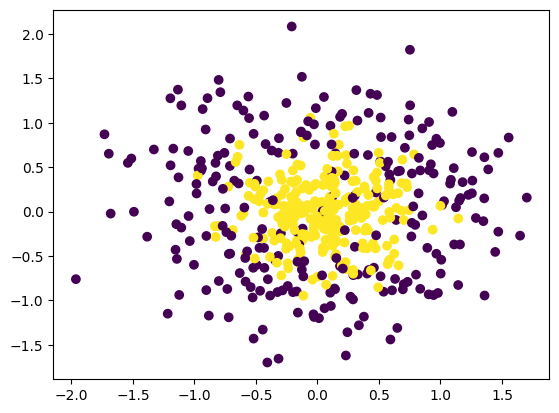

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
plt.scatter(X[:,0],X[:,1],c=y)

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10))

0.786

In [15]:
abc.fit(X,y)

AdaBoostClassifier()

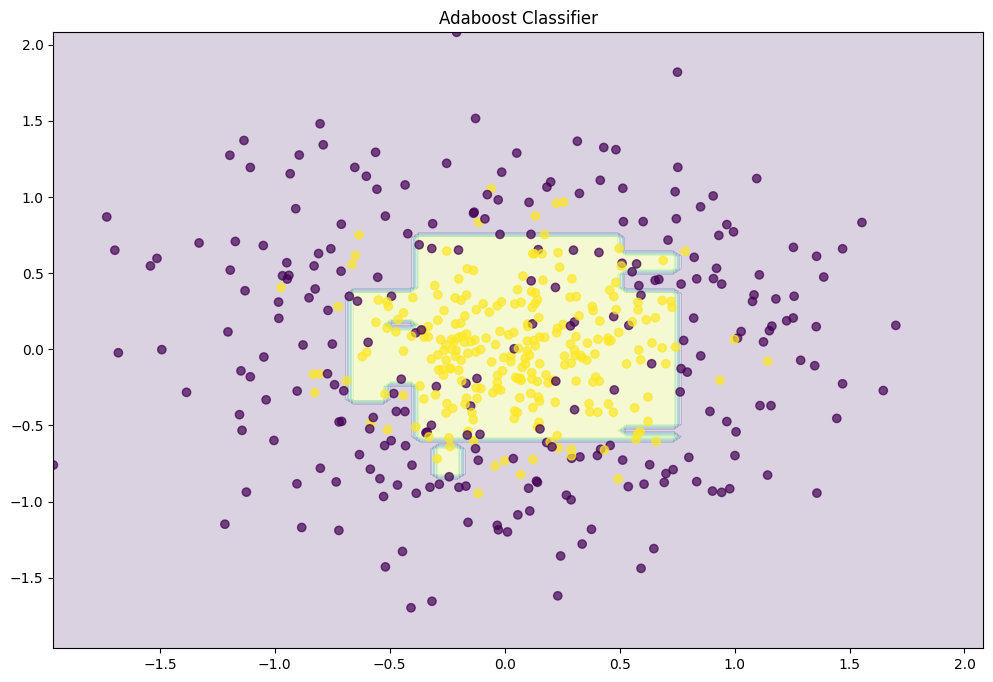

In [16]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()
    
plot_decision_boundary(abc)

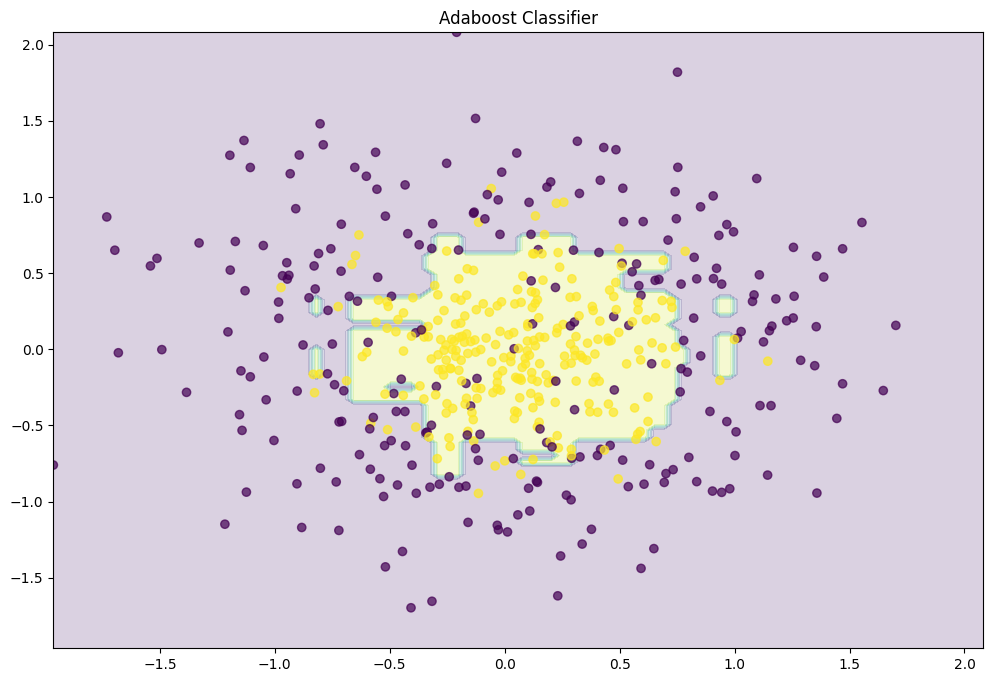

In [17]:
abc = AdaBoostClassifier(n_estimators=1500,learning_rate=0.1)
abc.fit(X,y)
plot_decision_boundary(abc)

### ii. Gradboost

In [18]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [19]:
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [21]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 3027.3585


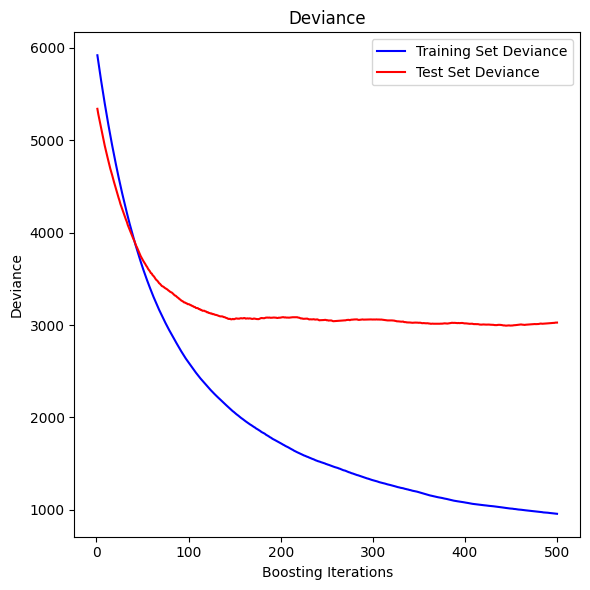

In [22]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

_Feature Importance_

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


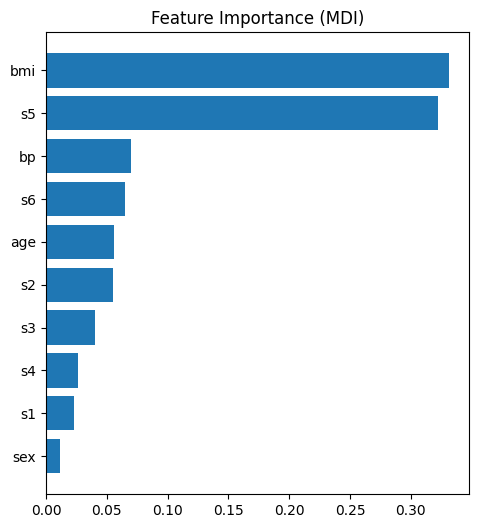

In [24]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(diabetes.feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(diabetes.feature_names)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

### iii. XgBoost

In [37]:
from xgboost import XGBClassifier
# read data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=.2)
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

1.0

## 4. Stacking

In [26]:
import numpy as np
import pandas as pd
df = pd.read_csv('data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
X = df.drop(columns=['target'])
y = df['target']
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)
print(X_train.shape)

(242, 13)


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=10)),
    ('gbdt',GradientBoostingClassifier())
]

In [34]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv=10
)
clf.fit(X_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('gbdt', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [35]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8688524590163934